In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import grad

from IPython.display import clear_output

In [2]:
dim1,dim2=2,2

In [3]:
def distmetric(Metrictensor,im1,im2):
    v1 = im1.flatten()
    v1 = v1/torch.norm(v1)
    
    v2 = im2.flatten()
    v2 = v2/torch.norm(v2)
    return torch.matmul(v1/torch.norm(v1),torch.matmul(Metrictensor,v2/torch.norm(v2)))

In [4]:
def distl2(Metrictensor,im2,im1,stepdir=None):
    imdiff = im2-im1
    if Metrictensor is None:
        Metrictensor = torch.tensor(np.eye(2).astype('float32'),requires_grad=False)#.cuda()
    if type(Metrictensor) is not 'torch.Tensor':
        Metrictensor = torch.tensor(Metrictensor,requires_grad=False)#.cuda()
    if stepdir is None:
        stepdir = torch.zeros(1,2)#.cuda()
    v1 = torch.add(imdiff,stepdir).flatten()
#     v1 = v1/torch.norm(v1)
     
    
    v2 = imdiff.flatten()
#     v2 = v2/torch.norm(v2)
#     return torch.sqrt(torch.sum(torch.mul(v1,torch.matmul(Metrictensor,v2))))
    return torch.sqrt(torch.sum(torch.mul(v1,torch.matmul(Metrictensor,v2)/(torch.sqrt(distmetric(Metrictensor,v1,v1))*torch.sqrt(distmetric(Metrictensor,v2,v2))))))

In [5]:
def plotline(rpts, rs, re):
    xv = [rpts[ii][0].cpu().detach().numpy() for ii in range(len(rpts))]
    yv = [rpts[ii][1].cpu().detach().numpy() for ii in range(len(rpts))]
    # plt.scatter(rstart.cpu().detach().numpy()[0],rstart.cpu().detach().numpy()[1])
    # plt.scatter(xv[1:-1],yv[1:-1],s=100,c=list(range(len(xv[1:-1]))))
    # plt.plot(xv[1:-1],yv[1:-1],color='r')

    plt.scatter(xv[:],yv[:],s=100,c=list(range(len(xv[:]))))
    plt.plot(xv[:],yv[:],color='r')

    plt.scatter(rs[0][0].cpu().detach().numpy(),rs[0][1].cpu().detach().numpy(),s=100,c=list(range(len(xv[0:1]))))
    plt.plot([rs[0][0].cpu().detach().numpy(),xv[0]],[rs[0][1].cpu().detach().numpy(),yv[0]],c='b')#,s=100,c=list(range(len(xv[0:1]))))
    # plt.plot(xv[0],yv[0],color='r')

    plt.scatter(re[0][0].cpu().detach().numpy(),re[0][1].cpu().detach().numpy(),s=100,c=list(range(len(xv[-2:-1]))))
    plt.plot([re[0][0].cpu().detach().numpy(),xv[-1]],[re[0][1].cpu().detach().numpy(),yv[-1]],c='g')#,s=100,c=list(range(len(xv[0:1]))))





In [6]:
def sphere_torch(xtorch, ytorch):
#     return torch.sqrt(torch.add(.2,-.2*torch.sum((torch.pow(xv,2))/.1,((torch.pow(yv,2))/.1))))
    return torch.sqrt(torch.add(.2,-.2*torch.add(torch.pow(xtorch,2)/1,-torch.pow(ytorch,2)/1)))#.cuda()
#     return torch.sqrt(torch.add(.1,-.1*torch.add(torch.pow(xtorch,2)/1,torch.pow(ytorch,2)/1)))#.cuda()
#     return torch.sqrt(torch.add(.1,(-.1/.03)*torch.add(torch.pow(xtorch,2)/1,torch.pow(ytorch,2)/1)))#.cuda()

In [7]:
def sphere():
    stpt = -2.875/4#.25;#-.9-0.5

    stepsz = .125/6;
    endpt = 2.875/4-stepsz/2;#-1.275;%-.9+0.5
    endpt

    (endpt-stpt)//stepsz


    numpts = 30
    maxp = 1.5
    xl = np.linspace(stpt, endpt, 1+int((endpt-stpt)//stepsz))
    yl = np.linspace(stpt, endpt, 1+int((endpt-stpt)//stepsz))

    xv, yv = np.meshgrid(xl, yl)

    xli = np.linspace(1, int((endpt-stpt)//stepsz),dtype='int')
    yli = np.linspace(1, int((endpt-stpt)//stepsz),dtype='int')

    xvind, yvind = np.meshgrid(xli, yli)

    zv = np.sqrt(.2-.2*((np.power(xv,2))/1 - (np.power(yv,2))/1))
#     zv = np.sqrt(.1/.03-(.1/.03)*((np.power(xv,2))/1 + (np.power(yv,2))/1))
    
    return xv,yv,zv

In [8]:
%matplotlib inline

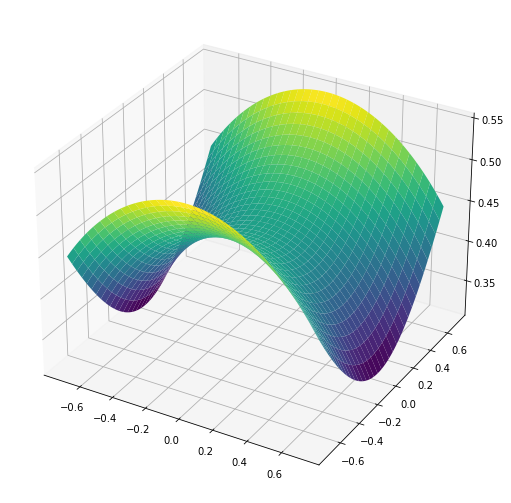

In [9]:
xv,yv,zv = sphere()
zv2 = np.sqrt(.1/.03-.1/.03*((np.power(xv,2))/1 - (np.power(yv,2))/1))

zv2 = np.sqrt(.2-.2*((np.power(xv,2))/1 - (np.power(yv,2))/1))
fig = plt.figure(figsize = [9,9])

gi = np.logical_not(np.isnan(zv2.flatten()))
zv2[np.isnan(zv2)]=0

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xv,yv,zv2, cmap=plt.cm.viridis)#,color=zv)

In [10]:

distout = []
eta=0.03/1
# eta = np.multiply
numpts = 12
rpts = 3.0*torch.add(.4*torch.rand([numpts,2],requires_grad=True),-.4/2)


# rs = 5.*torch.add(.4*torch.rand([1,2],requires_grad=False),-.4/2)

# re = 5.*torch.add(.4*torch.rand([1,2],requires_grad=False),-.4/2)
    

In [11]:
rs = torch.tensor([[.63,-.2]],requires_grad=False)
re = torch.tensor([[-.8,0]],requires_grad=False)

In [12]:
sphere_torch(rpts[:,0],rpts[:,1])

tensor([0.3762, 0.4558, 0.4025, 0.4743, 0.4579, 0.4490, 0.4042, 0.4674, 0.4299,
        0.4469, 0.4914, 0.3910], grad_fn=<SqrtBackward>)

In [13]:
rpts[:,0]

tensor([ 0.5408,  0.0903, -0.4996, -0.1794,  0.1348,  0.1128,  0.5603,  0.3449,
        -0.2761, -0.0660, -0.1492, -0.4939], grad_fn=<SelectBackward>)

In [14]:
%matplotlib inline

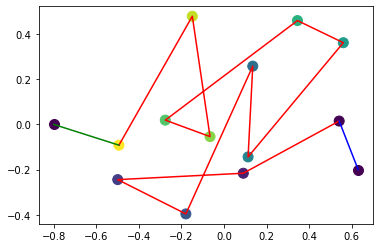

In [15]:
plotline(rpts, rs, re)

In [16]:
# for ii in range(len(rpts)):
#     rptsi = rpts[ii].clone().detach().requires_grad_(True)
#     # rptsall.append(rpts.detach().cpu()[:])
#     zp = sphere_torch(rptsi[0],rptsi[1])
#     rptsi.retain_grad()
#     zp.backward()
#     print(rptsi.grad[:])


In [17]:
# np.mul(rptsi.grad[:].cpu().numpy().T,rptsi.grad[:].cpu().numpy().T)

In [18]:
# np.outer(rptsi.grad[:].cpu(),rptsi.grad[:].cpu())
# Metrictensor = torch.tensor(np.eye(2).astype('float32'),requires_grad=False)#.cuda()

In [19]:
eta

0.03

In [20]:
eta = .03*2#

In [21]:
# len(rgrad),len(rpts)

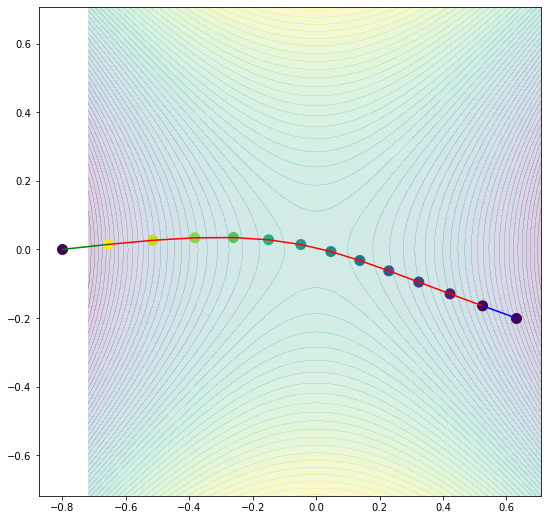

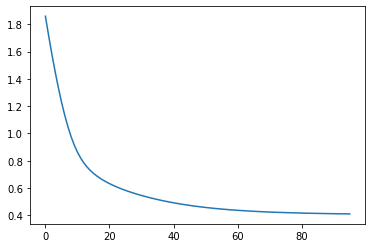

In [22]:
%matplotlib inline
total_steps = int(1*16*4*1.5)
for si in range(total_steps//1):
    
    clear_output(wait=True)
#     if si == 16:
#         eta /= 5.

    rgrad = []
    for ii in range(len(rpts)):
        rptsi = rpts[ii].clone().detach().requires_grad_(True)
        # rptsall.append(rpts.detach().cpu()[:])
        zp = sphere_torch(rptsi[0],rptsi[1])
        rptsi.retain_grad()
        zp.backward()
        
        # rgrad.append(rptsi.grad[:].cpu().numpy())
        
        rpg = rptsi.grad[:].cpu().numpy()
        sx = np.zeros([len(rpg),len(rpg)+1])
        sxeye = np.eye(len(rpg),dtype='float32')

        sx[:len(rpg),:len(rpg)]=sxeye
        sx[:,len(rpg)]=rpg

        rgrad.append(rpg)
#         print(rptsi.grad[:])
    
    totaldist = torch.tensor(0., requires_grad=True)
    
#     incdist =  distl2(Metrictensor=None, im1=rs,im2=rpts[0])
    incdist =  distl2(Metrictensor=np.outer(rgrad[ii],rgrad[ii]), im1=rs,im2=rpts[0])
    totaldist = totaldist + torch.pow(incdist,2)
    
    for jj in range(len(rpts)-1):
#         incdist =  distl2(Metrictensor=None, im1=rpts[jj],im2=rpts[jj+1])
#         metricavg = np.outer(rgrad[ii],rgrad[ii])
        metricavg = .5*(np.outer(rgrad[jj],rgrad[jj])+np.outer(rgrad[jj+1],rgrad[jj+1]))
        incdist =  distl2(Metrictensor=metricavg, im1=rpts[jj],im2=rpts[jj+1])

#         print(jj,np.sqrt(incdist.detach().numpy()))
        totaldist = totaldist + torch.pow(incdist,2)            
    
#     incdist =  distl2(Metrictensor=None, im1=rpts[-1],im2=re)
    
    incdist =  distl2(Metrictensor=np.outer(rgrad[ii],rgrad[ii]), im1=rpts[-1],im2=re)
    
    totaldist = totaldist + torch.pow(incdist,2)
    
    totaldist = torch.sqrt(totaldist)
    
    distout.append(totaldist.cpu())
    
    rpts.retain_grad()
    totaldist.backward(retain_graph=True)
#     print(totaldist.cpu())
#     print('rpts0 = ',rpts[0][:])

    rpts = rpts - eta*rpts.grad

    plt.figure(figsize=[9,9])
    plt.contourf(xv,yv,zv2,alpha=.2,levels=50)
    plotline(rpts, rs, re)
    
    xmin = np.min([torch.min(rpts[:,0]).data.cpu().numpy(), torch.min(rs[0][0]).data.cpu().numpy()])
    xmin = np.min([xmin, torch.min(re[0]).data.cpu().numpy()])
    
    xmax = np.max([torch.max(rpts[:,0]).data.cpu().numpy(), torch.max(rs[0][0]).data.cpu().numpy()])
    xmax = np.max([xmax, torch.max(re[0][0]).data.cpu().numpy()])
    
    ymin = np.min([torch.min(rpts[:,1]).data.cpu().numpy(), torch.min(rs[0][1]).data.cpu().numpy()])
    ymin = np.min([ymin, torch.min(re[0][1]).data.cpu().numpy()])
    
    ymax = np.max([torch.max(rpts[:,1]).data.cpu().numpy(), torch.max(rs[0][1]).data.cpu().numpy()])
    ymax = np.max([ymax, torch.max(re[0][1]).data.cpu().numpy()])
    
#     plt.xlim([xmin-.02,xmax+.02])
#     plt.ylim([ymin-.02,ymax+.02])
    plt.show()
    


plt.figure()
plt.plot(distout)

In [ ]:
rs=[.63,-.2]
re = [-.8,0]

In [ ]:
re

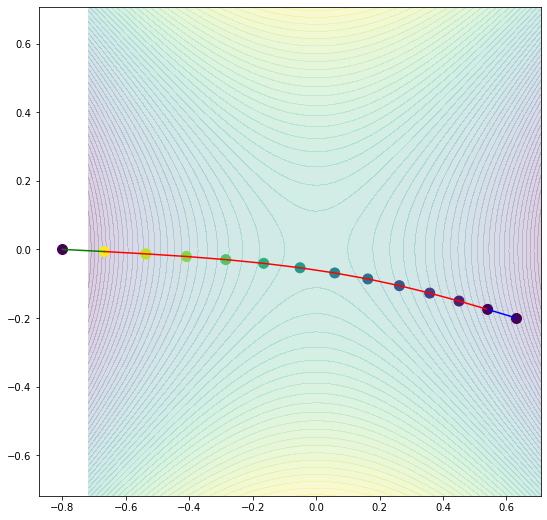

In [25]:

    plt.figure(figsize=[9,9])
    plt.contourf(xv,yv,zv2,alpha=.2,levels=50)
    plotline(rpts, rs, re)

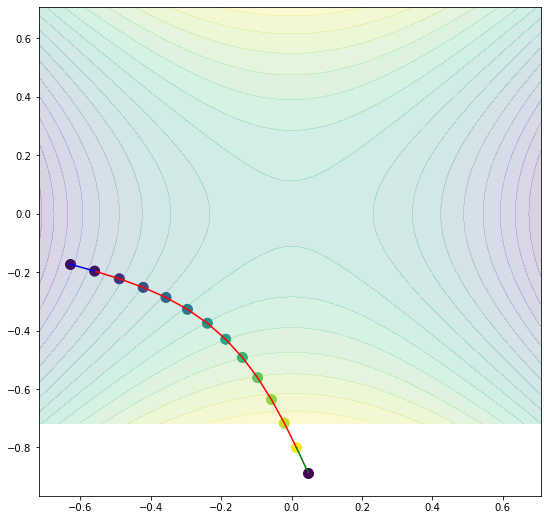

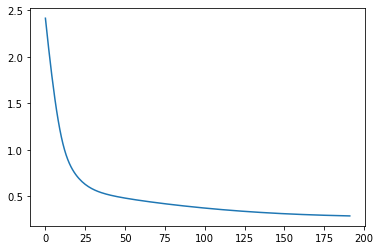

In [27]:
%matplotlib notebook
%matplotlib notebook

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


<IPython.core.display.Javascript object>


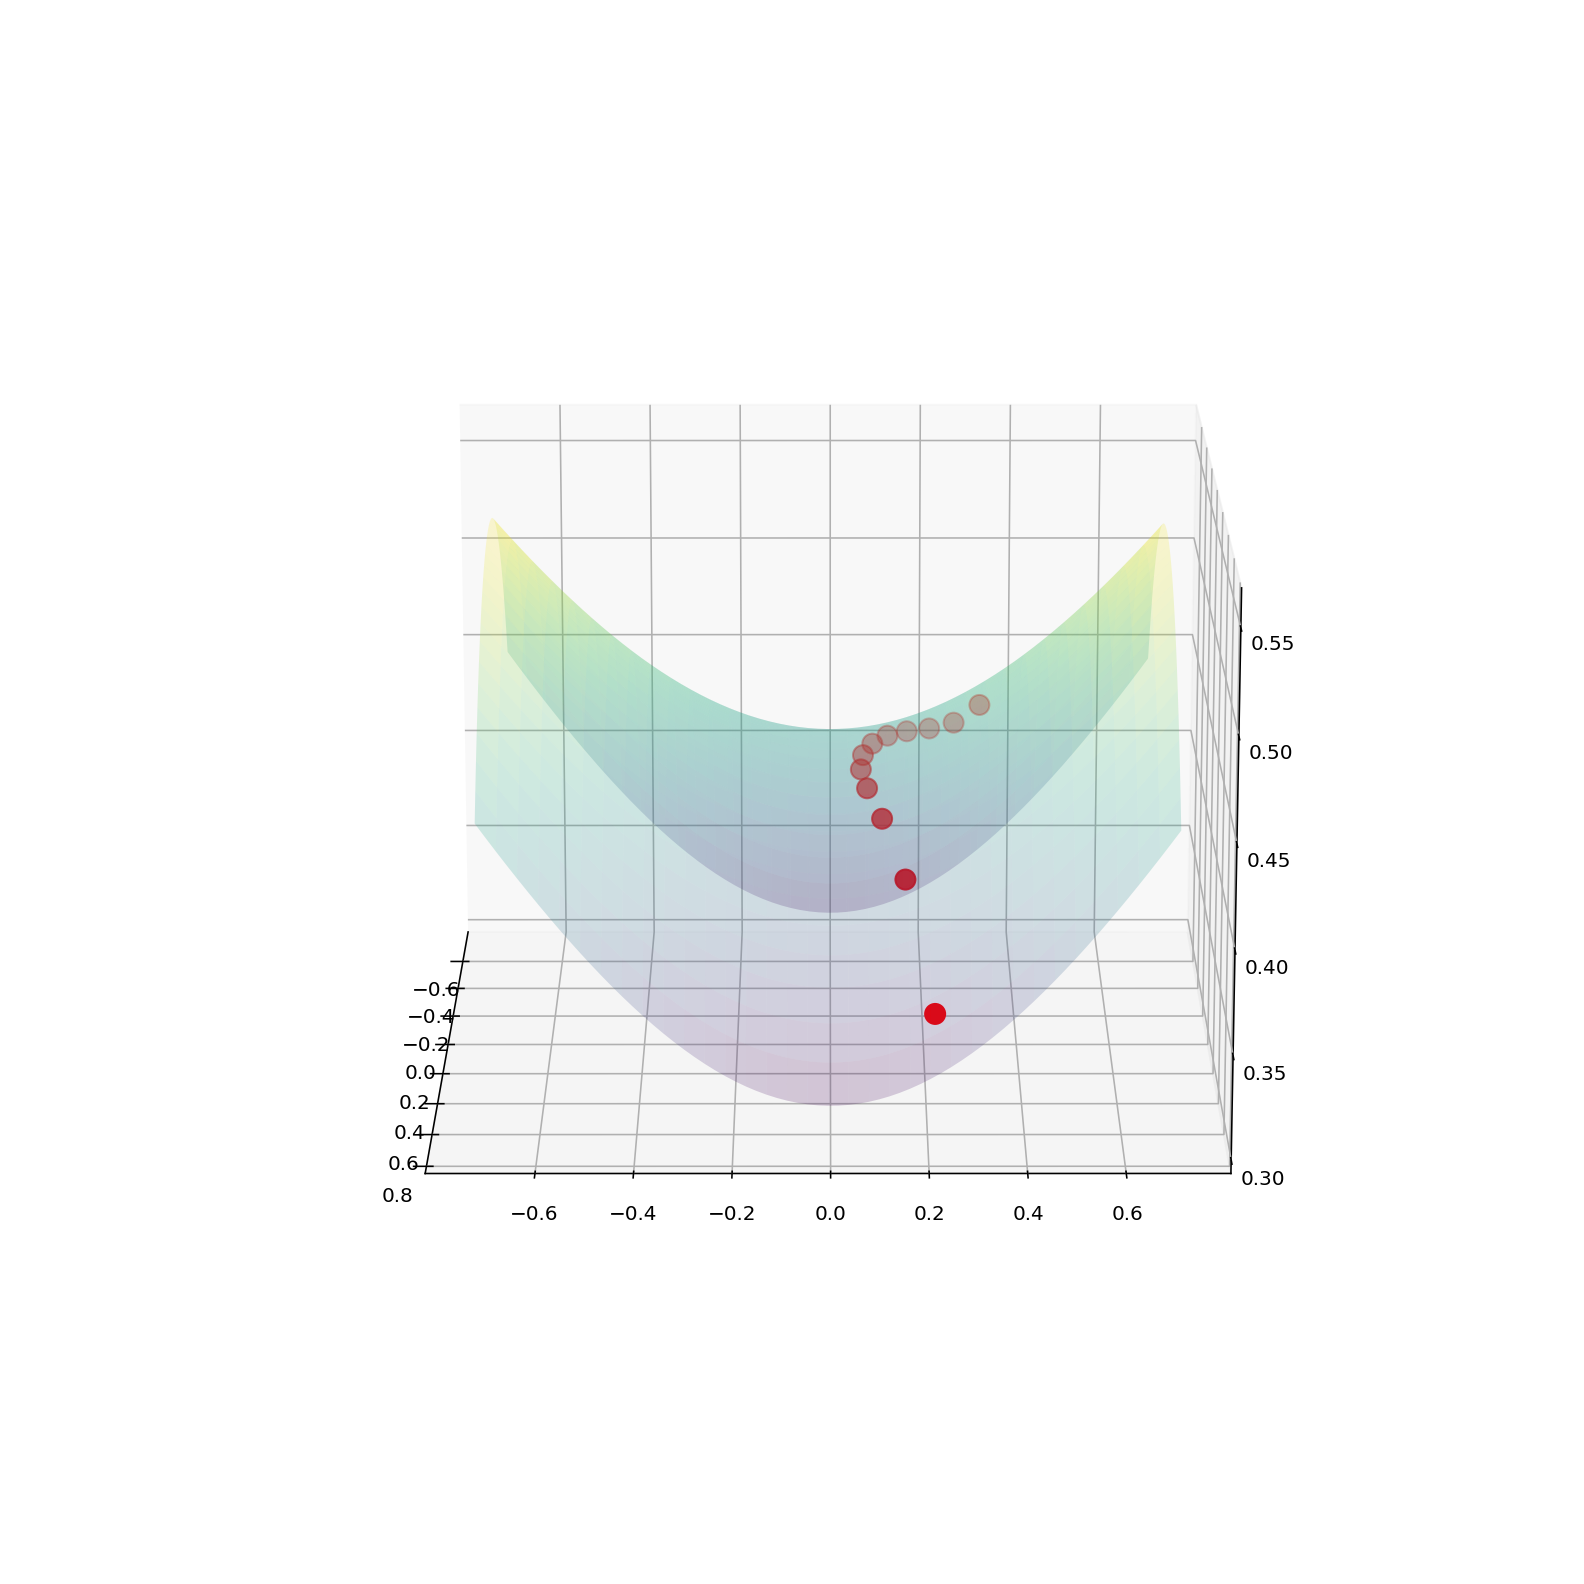

In [67]:
xv,yv,zv = sphere()
zv2 = np.sqrt(.2-.2*((np.power(xv,2))/1 - (np.power(yv,2))/1))
# zv2 = np.sqrt(.2-.2*((np.power(xv,2))/.1 + (np.power(yv,2))/.1))
fig = plt.figure(figsize = [11,11])

gi = np.logical_not(np.isnan(zv2.flatten()))
zv2[np.isnan(zv2)]=0

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xv,yv,zv2, cmap=plt.cm.viridis,alpha=.2)#,color=zv)

xv = [rpts[ii][0].cpu().detach().numpy() for ii in range(len(rpts))]
yv = [rpts[ii][1].cpu().detach().numpy() for ii in range(len(rpts))]
# plt.scatter(rstart.cpu().detach().numpy()[0],rstart.cpu().detach().numpy()[1])
# plt.scatter(xv[1:-1],yv[1:-1],s=100,c=list(range(len(xv[1:-1]))))
# plt.plot(xv[1:-1],yv[1:-1],color='r')

# plt.scatter(xv[:],yv[:],s=100,c=list(range(len(xv[:]))))
# plt.plot3(xv[:],yv[:],sphere_torch(rptsi[:,0],rptsi[:,1]),color='r')
ax.scatter(xv[:],yv[:],zpall,s=100,color='r')
ax.view_init(elev=10., azim=-180)

# ax.axis('equal')